Para resolver el sistema de ecuaciones diferenciales ordinarias resultantes, por la propia forma de la ecuación debemos recurrir a una solución numérica. El problema de regar el café mientras se camina es un problema físico de péndulo vertical con la introducción de un término no lineal que va a ser que el líquido pueda derramarse y por esta razón inferimos que el comportamiento del sistema deben ser unas oscilaciones que se excitan o decresen con el tiempo. Como valores iniciales se escoge (0, 0.1) que son valores típicos de los problemas de péndulo, esto significa que se inicia en la posición cero y con una aceleración pequeña. Escoger los parámetros λ, ϵ y Ω adecuadamente será crucial para obtener los resultados esperados. En nuestro problema los siguientes parámetros representan:

- τ = ωt es el tiempo no dimensional.
- $\varepsilon \lambda = -\frac{\Delta z}{r_0}$ es un parámetro que relaciona la amplitud de la oscilación vertical del pivote con la longitud del péndulo. ϵ es un 'bookkeeping' parameter.
- $\Omega = \frac{\omega}{\omega_0}$ es la frecuencia de excitación no dimensional.

Note que al hacer ϵ=λ=0, la ecuación (4) queda:
$u''(\tau)$ = -$u$ que tiene como porpuesta solución $c_1 cos(\tau) + c_2 sen(τ)$ un comportamiento sinosoidal; es decir, son los términos que contienen a lambda y epsilon los que controlan que el café oscile más fuerte y por ende se riegue, o por el contrario se acalme y no oscile tanto.


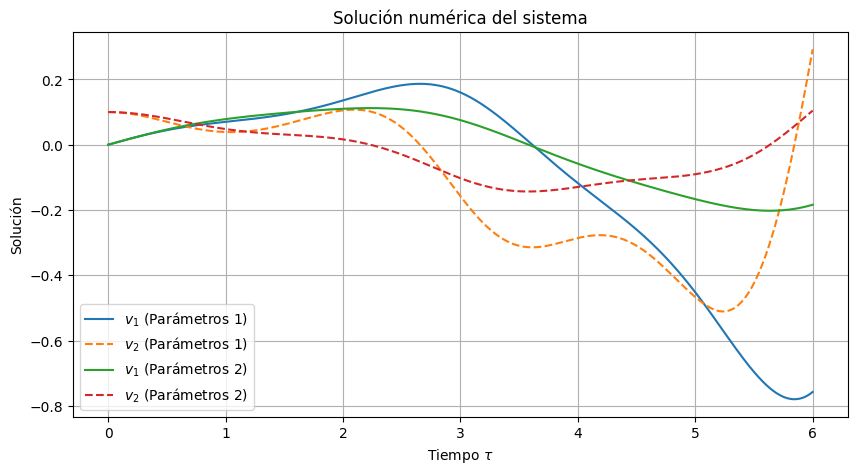

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir el sistema de EDOs
def sistema(tau, v, epsilon, lambda_, Omega):
    v1, v2 = v
    dv1_dtau = v2
    dv2_dtau = (1 + epsilon * lambda_ * Omega**2 * np.cos(Omega * tau)) * (epsilon**2 * v1**3 / 6 - v1)
    return [dv1_dtau, dv2_dtau]

# Condiciones iniciales
v0 = [0, 0.1]  # v1(0) = 1, v2(0) = 0

# Intervalo de integración en τ
tau_span = (0, 6)  # Desde τ = 0 hasta τ = 100
tau_eval = np.linspace(*tau_span, 1000)  # Puntos donde se evaluará la solución

# Primer conjunto de parámetros
parametros1 = (0.5, 1, 2)  # (epsilon, lambda, Omega)

# Segundo conjunto de parámetros
parametros2 = (0.2, 1, 2)

# Resolver el sistema para ambos conjuntos de parámetros
sol1 = solve_ivp(sistema, tau_span, v0, args=parametros1, t_eval=tau_eval)
sol2 = solve_ivp(sistema, tau_span, v0, args=parametros2, t_eval=tau_eval)

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(sol1.t, sol1.y[0], label=r'$v_1$ (Parámetros 1)')
plt.plot(sol1.t, sol1.y[1], '--', label=r'$v_2$ (Parámetros 1)')
plt.plot(sol2.t, sol2.y[0], label=r'$v_1$ (Parámetros 2)')
plt.plot(sol2.t, sol2.y[1], '--', label=r'$v_2$ (Parámetros 2)')
plt.xlabel(r'Tiempo $\tau$')
plt.ylabel('Solución')
plt.legend()
plt.title('Solución numérica del sistema')
plt.grid()
plt.show()


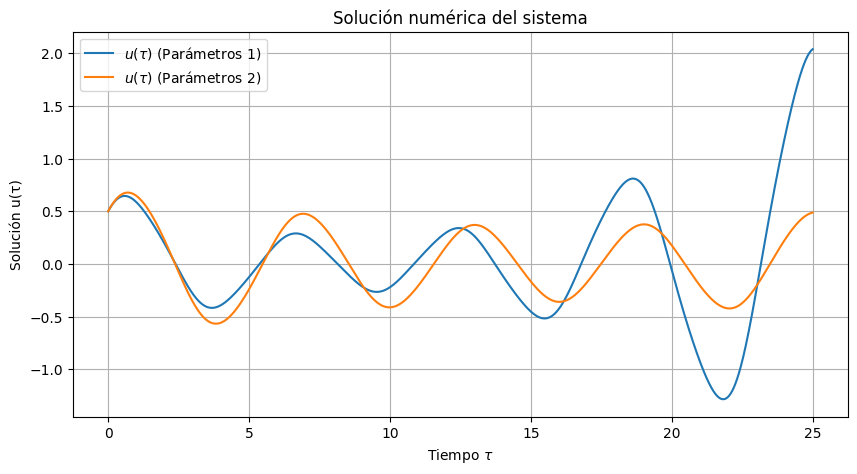

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy.integrate import solve_ivp

# Definir el sistema de EDOs
def sistema(tau, v, epsilon, lambda_, Omega):
    v1, v2 = v
    dv1_dtau = v2
    dv2_dtau = (1 + epsilon * lambda_ * Omega**2 * np.cos(Omega * tau)) * (epsilon**2 * v1**3 / 6 - v1)
    return [dv1_dtau, dv2_dtau]

# Condiciones iniciales
v0 = [0.5, 0.5]  # v1(0) = 0, v2(0) = 4

# Intervalo de integración en τ
tau_span = (0, 25)  # Desde τ = 0 hasta τ = 100

# Parámetros
parametros1 = (0.5, 0.3, 1.96)  # (epsilon, lambda, Omega)
parametros2 = (0.2, 0.3, 1.96)

# Resolver el sistema con un paso máximo de 0.1
sol1 = solve_ivp(sistema, tau_span, v0, args=parametros1, method='RK45', max_step=0.01)
sol2 = solve_ivp(sistema, tau_span, v0, args=parametros2, method='RK45', max_step=0.01)

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(sol1.t, sol1.y[0], label=r'$u(\tau)$ (Parámetros 1)')
plt.plot(sol2.t, sol2.y[0], label=r'$u(\tau)$ (Parámetros 2)')
plt.xlabel(r'Tiempo $\tau$')
plt.ylabel('Solución u(τ)')
plt.legend()
plt.title('Solución numérica del sistema')
plt.grid()
plt.show()
